<a href="https://colab.research.google.com/github/ashu979/FAll_DETECTION/blob/main/Fall_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                 FALL DETECTION FOR ELDERLY PEOPLE

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn

### sisfall Dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/PROJECT_6/SisFall_dataset.csv')

In [ ]:
df.head()

,ADXL345_x,ADXL345_y,ADXL345_z,ITG3200_x,ITG3200_y,ITG3200_z,MMA8451Q_x,MMA8451Q_y,MMA8451Q_z,Situation
0,5,-234,-82,37,4,-7,9,-959,-319,Fall
1,2,-234,-87,35,4,-7,8,-964,-319,Fall
2,6,-234,-84,35,3,-7,11,-962,-323,Fall
3,5,-234,-85,34,4,-8,7,-961,-323,Fall
4,7,-237,-83,34,4,-7,9,-959,-323,Fall


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ADXL345_x   int64 
 1   ADXL345_y   int64 
 2   ADXL345_z   int64 
 3   ITG3200_x   int64 
 4   ITG3200_y   int64 
 5   ITG3200_z   int64 
 6   MMA8451Q_x  int64 
 7   MMA8451Q_y  int64 
 8   MMA8451Q_z  int64 
 9   Situation   object
dtypes: int64(9), object(1)
memory usage: 160.0+ MB


In [ ]:
df.shape

(2097150, 10)

In [ ]:
df=df.sample(21000,random_state=42)

#### --> Understaing the Data 

##### *) The SisFall dataset.
#####   It consisted of up to 34 activities (falls and ADLs) that were performed by 38 participants with a wearable device fixed to their waist.

##### *) The SisFall dataset contains more participants, types of activities and recordings than any other publicly available dataset. It consists of 2706 ADL and 1798 falls, including data from 15 healthy independent elderly persons. To our knowledge, no public dataset contains data from elderly people, and their number of recordings is smaller

##### *) Types of fall

/content/drive/MyDrive/PROJECT_6


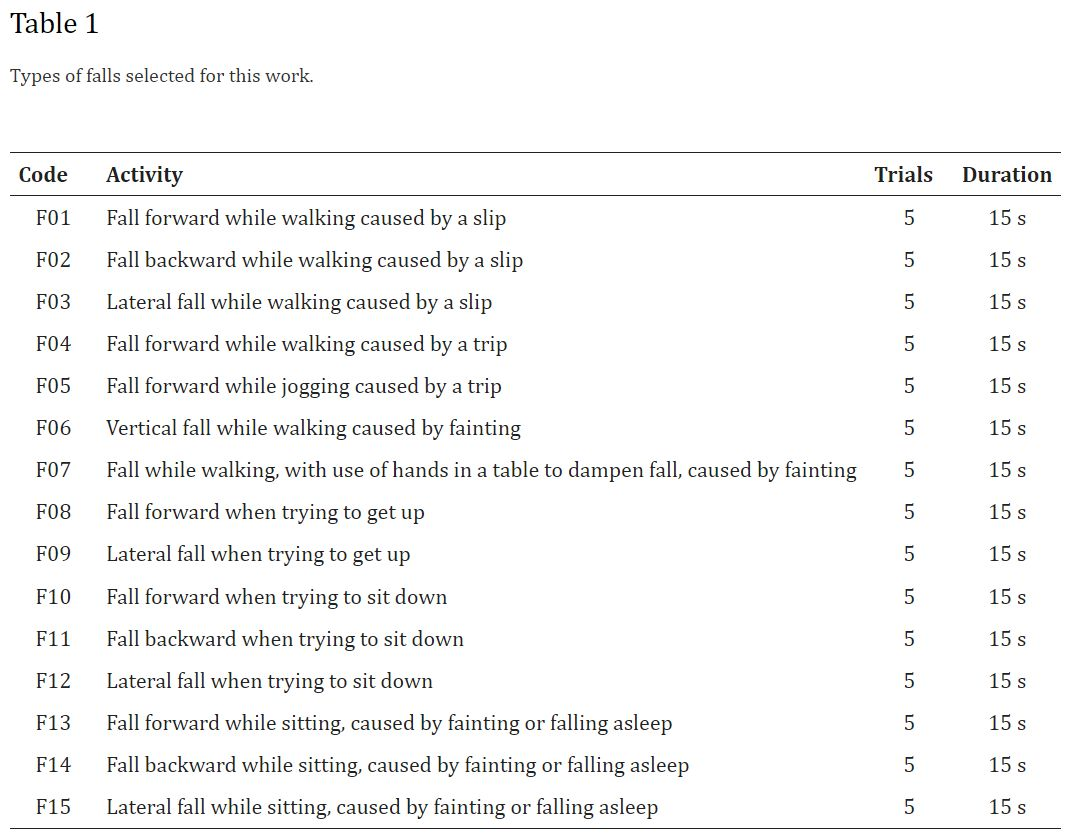

In [ ]:
%cd /content/drive/MyDrive/PROJECT_6/
from IPython.display import Image
Image(filename='type-of-fall.jpg')

##### *) The activity of daily living selected for this work 


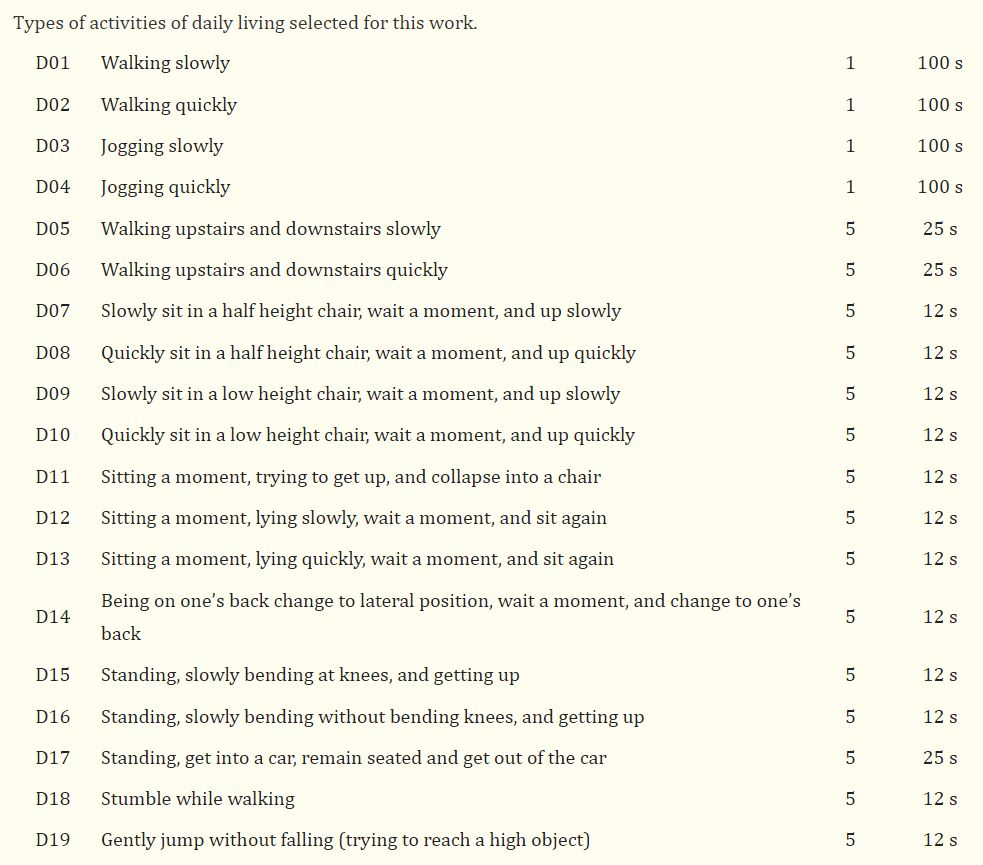

In [ ]:
Image(filename='type-of-activity.jpg')

##### *) Now , the device used to collect this data , are represented as :
#####    ADXL345 - Accelerometer
#####    ITG3200 - Gyroscope
#####    MMA8451Q -  Freescale Accelerometer

##### Only acceleration data acquired with the ADXL345 sensor was used in this work, as it is energy efficient and provides the larger span.

In [ ]:
df.describe()

,ADXL345_x,ADXL345_y,ADXL345_z,ITG3200_x,ITG3200_y,ITG3200_z,MMA8451Q_x,MMA8451Q_y,MMA8451Q_z
count,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,3.859952,-168.211429,-23.52019,-22.781286,29.093571,-6.396476,-34.377667,-657.423143,7.027429
std,110.359138,154.752708,131.63024,525.006336,498.123947,403.957535,433.234084,604.432738,524.160033
min,-1237.000000,-1801.000000,-1507.00000,-13181.000000,-4095.000000,-4758.000000,-5036.000000,-7055.000000,-6120.000000
25%,-18.000000,-256.000000,-100.00000,-73.000000,-17.000000,-24.000000,-114.000000,-995.000000,-271.000000
50%,10.000000,-222.000000,-32.00000,-28.000000,15.000000,-7.000000,-1.000000,-880.000000,-19.000000
75%,35.000000,-30.000000,49.00000,59.000000,59.000000,13.000000,79.000000,-110.000000,295.000000
max,930.000000,606.000000,1571.00000,7591.000000,6293.000000,4896.000000,3551.000000,2085.000000,6324.000000


In [ ]:
df.shape

(21000, 10)

In [ ]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ADXL345_x,ADXL345_y,ADXL345_z,ITG3200_x,ITG3200_y,ITG3200_z,MMA8451Q_x,MMA8451Q_y,MMA8451Q_z
ADXL345_x,1.000000,-0.076691,-0.056602,0.035481,0.084200,-0.045927,0.995484,-0.071630,-0.056728
ADXL345_y,-0.076691,1.000000,0.034893,0.140829,-0.003553,-0.021784,-0.084403,0.997989,0.024153
ADXL345_z,-0.056602,0.034893,1.000000,0.093948,-0.000801,-0.006888,-0.047330,0.023882,0.990507
ITG3200_x,0.035481,0.140829,0.093948,1.000000,0.020802,-0.065837,0.038472,0.131371,0.087867
ITG3200_y,0.084200,-0.003553,-0.000801,0.020802,1.000000,-0.143351,0.086812,-0.001671,0.001043
ITG3200_z,-0.045927,-0.021784,-0.006888,-0.065837,-0.143351,1.000000,-0.049881,-0.021016,-0.006523
MMA8451Q_x,0.995484,-0.084403,-0.047330,0.038472,0.086812,-0.049881,1.000000,-0.082268,-0.055495
MMA8451Q_y,-0.071630,0.997989,0.023882,0.131371,-0.001671,-0.021016,-0.082268,1.000000,0.018343
MMA8451Q_z,-0.056728,0.024153,0.990507,0.087867,0.001043,-0.006523,-0.055495,0.018343,1.000000


### CLEANING THE DATA

In [ ]:
df.isnull()

,ADXL345_x,ADXL345_y,ADXL345_z,ITG3200_x,ITG3200_y,ITG3200_z,MMA8451Q_x,MMA8451Q_y,MMA8451Q_z,Situation
1125183,False,False,False,False,False,False,False,False,False,False
25825,False,False,False,False,False,False,False,False,False,False
792140,False,False,False,False,False,False,False,False,False,False
1954170,False,False,False,False,False,False,False,False,False,False
282235,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1429012,False,False,False,False,False,False,False,False,False,False
245329,False,False,False,False,False,False,False,False,False,False
1737097,False,False,False,False,False,False,False,False,False,False
713682,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['Situation'].value_counts()

Not Fall    10513
Fall        10486
Name: Situation, dtype: int64

##### In the current work, accelerometer data from a wearable sensor is used, so dropping the unwanted columns

In [ ]:
df.drop(columns = ['ITG3200_x','ITG3200_y','ITG3200_z','MMA8451Q_x','MMA8451Q_y','MMA8451Q_z'] , inplace= True)

In [ ]:
df

,ADXL345_x,ADXL345_y,ADXL345_z,Situation
1125183,-2,-260,-36,Not Fall
25825,152,62,-216,Fall
792140,28,-182,139,Fall
1954170,78,-443,39,Not Fall
282235,16,-259,-59,Fall
...,...,...,...,...
1429012,0,-249,-35,Not Fall
245329,-233,-4,-112,Fall
1737097,23,-258,-11,Not Fall
713682,61,16,207,Fall


In [ ]:
X= df.drop(columns =['Situation'])

In [ ]:
X

,ADXL345_x,ADXL345_y,ADXL345_z
1125183,-2,-260,-36
25825,152,62,-216
792140,28,-182,139
1954170,78,-443,39
282235,16,-259,-59
...,...,...,...
1429012,0,-249,-35
245329,-233,-4,-112
1737097,23,-258,-11
713682,61,16,207


In [ ]:
X.describe()

,ADXL345_x,ADXL345_y,ADXL345_z
count,20999.000000,20999.00000,20999.000000
mean,3.863136,-168.23163,-23.521739
std,110.360802,154.72870,131.633183
min,-1237.000000,-1801.00000,-1507.000000
25%,-18.000000,-256.00000,-100.000000
50%,10.000000,-222.00000,-32.000000
75%,35.000000,-30.00000,49.000000
max,930.000000,606.00000,1571.000000


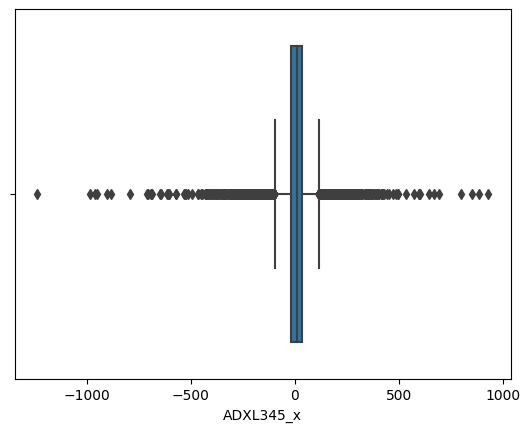

In [ ]:
sns.boxplot(x =df['ADXL345_x']);

#### Removing Outliers using IQR method

In [ ]:

'''
def remove_outlier_IQR(x):
    # x= int(x)
    sorted(x)
    Q1=np.quantile(df,0.25)
    Q3=np.quantile(df,0.75)
    IQR=Q3-Q1
    lower = Q1-1.5*IQR
    upper =Q3+1.5*IQR
    # if(x<int(lower)):
    #     (x) = lower
    # if(x>int(upper)):
    #     (x) = upper
    x = (x.height >lower & x.height <upper)

    sorted(df['ADXL345_x'])
    Q1,Q3= np.percentile(df['ADXL345_x'],[25,75])
    iqr=Q3-Q1
    lower=Q1-(1.5*iqr)
    upper=Q3+(1.5*iqr)
'''

sorted(df['ADXL345_x'])
Q1,Q3= np.percentile(df['ADXL345_x'],[25,75])
iqr=Q3-Q1
lower=Q1-(1.5*iqr)
upper=Q3+(1.5*iqr)

        

In [ ]:
df['ADXL345_x'] =df['ADXL345_x'][(df['ADXL345_x'].values >lower) & (df['ADXL345_x'].values <upper)]
# df['ADXL345_x']=df['ADXL345_x'].apply(remove_outlier_IQR)

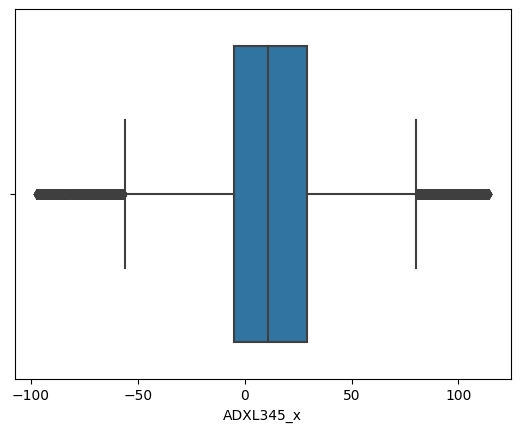

In [ ]:
sns.boxplot(x =df['ADXL345_x']);

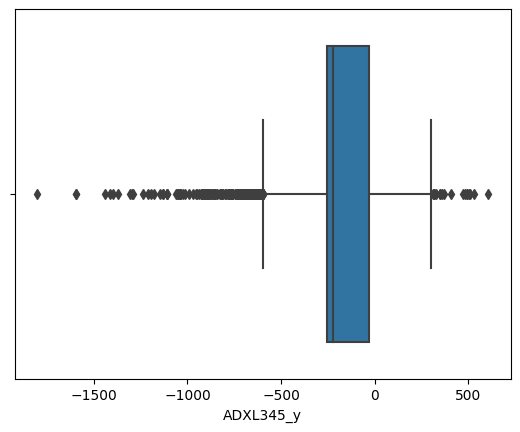

In [ ]:
sns.boxplot(x =df['ADXL345_y']);

In [ ]:
sorted(df['ADXL345_y'])
Q1,Q3= np.percentile(df['ADXL345_y'],[25,75])
iqr=Q3-Q1
lower=Q1-(1.5*iqr)
upper=Q3+(1.5*iqr)
df['ADXL345_y'] =df['ADXL345_y'][(df['ADXL345_y'].values >lower) & (df['ADXL345_y'].values <upper)]

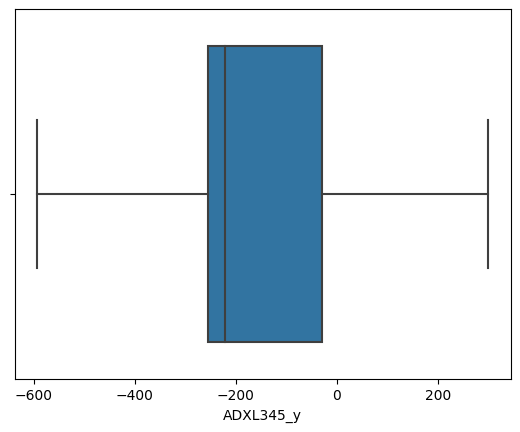

In [ ]:
sns.boxplot(x =df['ADXL345_y']);

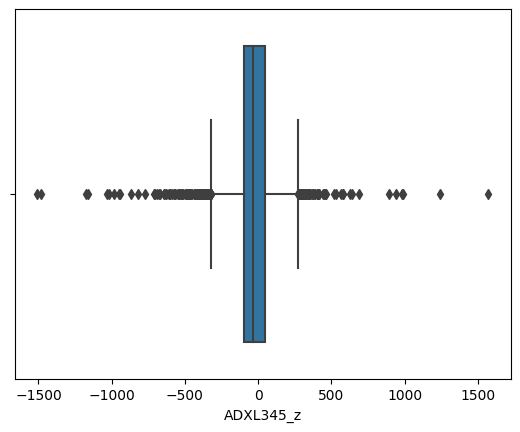

In [ ]:
sns.boxplot(x =df['ADXL345_z']);

In [ ]:
sorted(df['ADXL345_z'])
Q1,Q3= np.percentile(df['ADXL345_z'],[25,75])
iqr=Q3-Q1
lower=Q1-(1.5*iqr)
upper=Q3+(1.5*iqr)
df['ADXL345_z'] =df['ADXL345_z'][(df['ADXL345_z'].values >lower) & (df['ADXL345_z'].values <upper)]

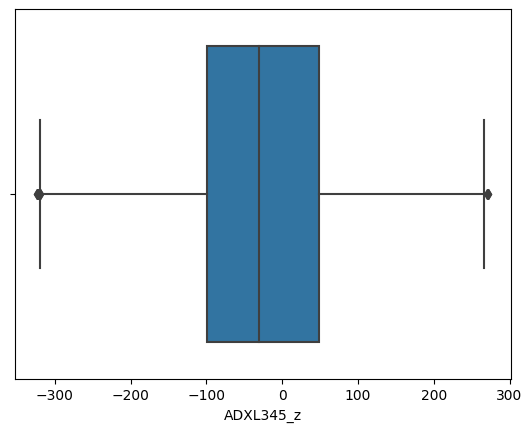

In [ ]:
sns.boxplot(x =df['ADXL345_z']);

#### PREPROCESSING THE DATA

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
SS= RobustScaler()

In [ ]:
X = SS.fit_transform(X)

In [ ]:
X

array([[-0.22641509, -0.16814159, -0.02684564],
       [ 2.67924528,  1.25663717, -1.23489933],
       [ 0.33962264,  0.17699115,  1.14765101],
       ...,
       [ 0.24528302, -0.15929204,  0.1409396 ],
       [ 0.96226415,  1.05309735,  1.60402685],
       [-0.94339623,  0.92035398, -1.43624161]])

In [ ]:
y = df['Situation']

In [ ]:
y

1125183    Not Fall
25825          Fall
792140         Fall
1954170    Not Fall
282235         Fall
             ...   
1429012    Not Fall
245329         Fall
1737097    Not Fall
713682         Fall
914719         Fall
Name: Situation, Length: 20999, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
L = LabelEncoder()

In [ ]:
y = L.fit_transform(y)

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 0])

### Decision Tree Implementation

In [ ]:
df

,ADXL345_x,ADXL345_y,ADXL345_z,Situation
1125183,-2.0,-260.0,-36.0,Not Fall
25825,NaN,62.0,-216.0,Fall
792140,28.0,-182.0,139.0,Fall
1954170,78.0,-443.0,39.0,Not Fall
282235,16.0,-259.0,-59.0,Fall
...,...,...,...,...
1429012,0.0,-249.0,-35.0,Not Fall
245329,NaN,-4.0,-112.0,Fall
1737097,23.0,-258.0,-11.0,Not Fall
713682,61.0,16.0,207.0,Fall


In [ ]:
X

array([[-0.22641509, -0.16814159, -0.02684564],
       [ 2.67924528,  1.25663717, -1.23489933],
       [ 0.33962264,  0.17699115,  1.14765101],
       ...,
       [ 0.24528302, -0.15929204,  0.1409396 ],
       [ 0.96226415,  1.05309735,  1.60402685],
       [-0.94339623,  0.92035398, -1.43624161]])

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , roc_auc_score
from sklearn.metrics import accuracy_score , classification_report
from sklearn.metrics import precision_score ,recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train , X_test , y_train , y_test =  train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
def print_score(clf, X_train,X_test , y_train , y_test , train= True):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)

  if train:
    '''
    training performance 
    '''

    res=clf.predict(X_train)
    print("Train Result :\n")
    print("Accuracy score : {0:4f}\n".format(accuracy_score(y_train, res)))
    print("Classification Report :\n {}\n".format(classification_report(y_train, res)))
    print("Confusion Matrix :\n {} \n".format(confusion_matrix(y_train, res)))

    print("ROC AUC: {0:4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))

    res = cross_val_score(clf ,X_train , y_train , cv = 10 , scoring="accuracy")
    print("Average Accuracy : {0:4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:4f}".format(np.std(res)))


  elif train==False :

    res = clf.predict(X_test)
    print("Test Result :\n")
    print("Accuracy score : {0:4f}\n".format(accuracy_score(y_test, res)))
    print("Classification Report :\n {}\n".format(classification_report(y_test, res)))
    print("Confusion Matrix :\n {} \n".format(confusion_matrix(y_test, res)))

    print("ROC AUC: {0:4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res))))


In [ ]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [ ]:
# C=0.01
# clf = svm.SVC(kernel='linear' , C=C)
# clf.fit(X_std_train , y_train)

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_std_train,y_train)

DecisionTreeClassifier()

In [ ]:
print_score(dt,X_train , X_test , y_train , y_test , train = True)
print("/**************************************************/")
print_score(dt,X_train , X_test , y_train , y_test , train = False)

Train Result :

Accuracy score : 0.555688

Classification Report :
               precision    recall  f1-score   support

           0       0.56      0.51      0.53      8364
           1       0.55      0.60      0.58      8435

    accuracy                           0.56     16799
   macro avg       0.56      0.56      0.55     16799
weighted avg       0.56      0.56      0.55     16799


Confusion Matrix :
 [[4237 4127]
 [3337 5098]] 

ROC AUC: 0.555481

Average Accuracy : 0.744748
Accuracy SD: 		 0.009398
/**************************************************/
Test Result :

Accuracy score : 0.561429

Classification Report :
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      2122
           1       0.55      0.60      0.58      2078

    accuracy                           0.56      4200
   macro avg       0.56      0.56      0.56      4200
weighted avg       0.56      0.56      0.56      4200


Confusion Matrix :
 [[1102 1020]
 [

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=pd.MultiIndex.from_product([['Prediction'],['Negative','Positive']]),
             index = pd.MultiIndex.from_product([['Actual'] ,['Negative','Positive']]))

Prediction         
                  Negative Positive
Actual Negative       1102     1020
       Positive        822     1256

In [ ]:
f1_score(y_test,y_pred)

0.5769407441433165

### RANDOM FOREST IMPLEMENTATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf=RandomForestClassifier(random_state = 42 , n_estimators=100)

In [ ]:
rf_clf.fit(X_std_train,y_train)
# y_pred=rf.predict(X_test)
# print(f1_score(y_test,y_pred))

RandomForestClassifier(random_state=42)

In [ ]:
print_score(rf_clf ,X_train , X_test , y_train , y_test ,train = True)
print("\n /*********************************************/ \n")
print_score(rf_clf ,X_train , X_test , y_train , y_test ,train = False)

Train Result :

Accuracy score : 0.672123

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      8364
           1       0.65      0.74      0.69      8435

    accuracy                           0.67     16799
   macro avg       0.67      0.67      0.67     16799
weighted avg       0.67      0.67      0.67     16799


Confusion Matrix :
 [[5083 3281]
 [2227 6208]] 

ROC AUC: 0.671852

Average Accuracy : 0.794274
Accuracy SD: 		 0.005414

 /*********************************************/ 

Test Result :

Accuracy score : 0.664762

Classification Report :
               precision    recall  f1-score   support

           0       0.69      0.62      0.65      2122
           1       0.65      0.71      0.68      2078

    accuracy                           0.66      4200
   macro avg       0.67      0.67      0.66      4200
weighted avg       0.67      0.66      0.66      4200


Confusion Matrix :
 [[1308  814]
 [ 

### Grid Search Ensemble

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid = {'max_depth': [3, None],
              'min_samples_split': [2, 3, 10],
              'min_samples_leaf': [1, 3, 10],
               'bootstrap': [True, False],
              'criterion': ["gini", "entropy"]}

In [ ]:
grid_search = GridSearchCV(rf_clf , params_grid ,
                           n_jobs =-1 ,cv=5 ,
                           verbose =1 , 
                            scoring = 'accuracy')

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.802964583421937

In [ ]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print_score(grid_search , X_train ,X_test , y_train , y_test,train = False)
print("\n /****************************/ \n")
print_score(grid_search , X_train , X_test , y_train , y_test , train = True)

Test Result :

Accuracy score : 0.801429

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      2122
           1       0.76      0.88      0.81      2078

    accuracy                           0.80      4200
   macro avg       0.81      0.80      0.80      4200
weighted avg       0.81      0.80      0.80      4200


Confusion Matrix :
 [[1536  586]
 [ 248 1830]] 

ROC AUC: 0.802250


 /****************************/ 

Train Result :

Accuracy score : 0.896244

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      8364
           1       0.86      0.94      0.90      8435

    accuracy                           0.90     16799
   macro avg       0.90      0.90      0.90     16799
weighted avg       0.90      0.90      0.90     16799


Confusion Matrix :
 [[7086 1278]
 [ 465 7970]] 

ROC AUC: 0.896037

Fitting 5 folds for each of 72 candida

#### Extra -Trees Ensemble

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
xt_clf = ExtraTreesClassifier(random_state=42 , n_estimators=100)

In [ ]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
print_score(xt_clf ,X_train ,X_test , y_train ,y_test , train = False)  
print("\n /**************************************/ \n")
print_score(xt_clf , X_train , X_test , y_train , y_test , train = True)

Test Result :

Accuracy score : 0.785952

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.73      0.77      2122
           1       0.75      0.84      0.80      2078

    accuracy                           0.79      4200
   macro avg       0.79      0.79      0.79      4200
weighted avg       0.79      0.79      0.79      4200


Confusion Matrix :
 [[1546  576]
 [ 323 1755]] 

ROC AUC: 0.786560


 /**************************************/ 

Train Result :

Accuracy score : 0.998869

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8364
           1       1.00      1.00      1.00      8435

    accuracy                           1.00     16799
   macro avg       1.00      1.00      1.00     16799
weighted avg       1.00      1.00      1.00     16799


Confusion Matrix :
 [[8364    0]
 [  19 8416]] 

ROC AUC: 0.998874

Average Accuracy : 0.794334


#### ADABoost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(random_state = 42 ,  n_estimators=100 )

In [ ]:
ada_clf.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print_score(xt_clf ,X_train ,X_test , y_train ,y_test , train = False)  
print("\n /**************************************/ \n")
print_score(xt_clf , X_train , X_test , y_train , y_test , train = True)

Test Result :

Accuracy score : 0.785952

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.73      0.77      2122
           1       0.75      0.84      0.80      2078

    accuracy                           0.79      4200
   macro avg       0.79      0.79      0.79      4200
weighted avg       0.79      0.79      0.79      4200


Confusion Matrix :
 [[1546  576]
 [ 323 1755]] 

ROC AUC: 0.786560


 /**************************************/ 

Train Result :

Accuracy score : 0.998869

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8364
           1       1.00      1.00      1.00      8435

    accuracy                           1.00     16799
   macro avg       1.00      1.00      1.00     16799
weighted avg       1.00      1.00      1.00     16799


Confusion Matrix :
 [[8364    0]
 [  19 8416]] 

ROC AUC: 0.998874

Average Accuracy : 0.794334


#### AdaBoost with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(random_state = 42 ,  n_estimators=100 ))

In [ ]:
ada_clf.fit(X_train , y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42))

In [ ]:
print_score(xt_clf ,X_train ,X_test , y_train ,y_test , train = False)  
print("\n /**************************************/ \n")
print_score(xt_clf , X_train , X_test , y_train , y_test , train = True)

Test Result :

Accuracy score : 0.785952

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.73      0.77      2122
           1       0.75      0.84      0.80      2078

    accuracy                           0.79      4200
   macro avg       0.79      0.79      0.79      4200
weighted avg       0.79      0.79      0.79      4200


Confusion Matrix :
 [[1546  576]
 [ 323 1755]] 

ROC AUC: 0.786560


 /**************************************/ 

Train Result :

Accuracy score : 0.998869

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8364
           1       1.00      1.00      1.00      8435

    accuracy                           1.00     16799
   macro avg       1.00      1.00      1.00     16799
weighted avg       1.00      1.00      1.00     16799


Confusion Matrix :
 [[8364    0]
 [  19 8416]] 

ROC AUC: 0.998874

Average Accuracy : 0.794334


### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=5 , n_estimaters=100 ,learning_rate= 0.3 ,
                            n_jobs = -1)

In [ ]:
xgb_clf.fit(X_train , y_train)

[17:50:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimaters" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimaters=100, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
print_score(xt_clf ,X_train ,X_test , y_train ,y_test , train = False)  
print("\n /**************************************/ \n")
print_score(xt_clf , X_train , X_test , y_train , y_test , train = True)

Test Result :

Accuracy score : 0.785952

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.73      0.77      2122
           1       0.75      0.84      0.80      2078

    accuracy                           0.79      4200
   macro avg       0.79      0.79      0.79      4200
weighted avg       0.79      0.79      0.79      4200


Confusion Matrix :
 [[1546  576]
 [ 323 1755]] 

ROC AUC: 0.786560


 /**************************************/ 

Train Result :

Accuracy score : 0.998869

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8364
           1       1.00      1.00      1.00      8435

    accuracy                           1.00     16799
   macro avg       1.00      1.00      1.00     16799
weighted avg       1.00      1.00      1.00     16799


Confusion Matrix :
 [[8364    0]
 [  19 8416]] 

ROC AUC: 0.998874

Average Accuracy : 0.794334


### Comparison of outputs 

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.4 MB/s eta 0:00:0

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
# !pip install  enable_colab


In [ ]:
# enable_colab()

In [ ]:
# import tensorflow_probability.substrates.jax as tfp_jax
# tfp_jax.experimental.enable_x64()
s=setup(data=df,target=df.columns[-1])

,Description,Value
0,Session id,7864
1,Target,Situation
2,Target type,Binary
3,Target mapping,"Fall: 0, Not Fall: 1"
4,Original data shape,"(20999, 4)"
5,Transformed data shape,"(20999, 4)"
6,Transformed train set shape,"(14699, 4)"
7,Transformed test set shape,"(6300, 4)"
8,Numeric features,3
9,Rows with missing values,24.0%


In [ ]:
# dt_pycaret = create_model(dt)
# rf_pycaret = create_model(rf_clf)
# xt_pycaret= create_model(xt_clf)
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7849,0.8573,0.8550,0.7504,0.7992,0.5697,0.5755,0.3330
xgboost,Extreme Gradient Boosting,0.7841,0.8569,0.8305,0.7604,0.7939,0.5681,0.5706,0.7670
rf,Random Forest Classifier,0.7816,0.8589,0.8195,0.7624,0.7898,0.5632,0.5650,1.4650
knn,K Neighbors Classifier,0.7800,0.8446,0.8085,0.7655,0.7863,0.5599,0.5610,0.1230
et,Extra Trees Classifier,0.7751,0.8518,0.8166,0.7547,0.7843,0.5501,0.5521,1.2590
gbc,Gradient Boosting Classifier,0.7505,0.8247,0.8401,0.7130,0.7712,0.5008,0.5091,0.9660
dt,Decision Tree Classifier,0.7328,0.7335,0.7294,0.7349,0.7321,0.4655,0.4657,0.0980
nb,Naive Bayes,0.7148,0.7415,0.8186,0.6784,0.7419,0.4295,0.4390,0.0780
qda,Quadratic Discriminant Analysis,0.7144,0.7463,0.8193,0.6777,0.7418,0.4286,0.4384,0.0820
ada,Ada Boost Classifier,0.7041,0.7881,0.7668,0.6820,0.7218,0.4082,0.4115,0.7400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]